# 07 Your First Deep Learning Project in Python with Keras Step-By-Step

#### Source:

This practical is based on the blog post:

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/

Here we are going to reproduce parts of that post.
I recommend using Anaconda Python, read the installation guide for it under Unit 7. Use Python 3.x.



### Prerequisites:
Libraries used in this tutorial:
- keras (now built into TensorFlow)
- numpy
- sklearn
- pydot

External libraries (necessary for visualization):
- https://graphviz.gitlab.io/download/

If you set up your machine at home you can remove the cell below

In [6]:
!pip install pydot
!pip install graphviz
!pip install tensorflow

#### Datasets used
Please download the following datasets and put them into the folder, where this notebook is located (i.e. your working directory):
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
- http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
- https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.data

### Install Tensorflow:

In [7]:
import tensorflow as tf
from tensorflow import keras


In [8]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# For plotting layers import one of these two:
#from keras.utils.vis_utils import plot_model
from tensorflow.keras.utils import plot_model


import pydot
import matplotlib.pyplot as plt

#### Load the Pima Indian dataset

It is a csv file with ',' as delimiter.

In [12]:
# load the dataset
dataset = loadtxt('pima-indians-diabetes.data.csv', delimiter=',')

The variables can be summarized as follows:

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (Y):

1. Class variable (0 or 1)

# Task 0
What is the size of this dataset? Take a look at a few rows of this dataset to make sure you understand the structure of the data.

In [13]:
# Separate the dataset into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
print("original dataset shape:", dataset.shape)

original dataset shape: (768, 9)


- The model expects rows of data with 8 variables (the input_dim=8 argument)
- The first hidden layer has 12 nodes and uses the relu activation function.
- The second hidden layer has 8 nodes and uses the relu activation function.
- The output layer has one node and uses the sigmoid activation function.

In [14]:
# define the Keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
#Check your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


To train a neural network model you will need to specify a loss function, an optimizer, and some metrics for monitoring.

https://www.tensorflow.org/guide/keras/train_and_evaluate/

In [16]:
# compile the Keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# fit the Keras model on the dataset
history = model.fit(X, Y, epochs=150, batch_size=10)

Epoch 1/150
77/77 [==============================] - 1s 2ms/step - loss: 7.2719 - accuracy: 0.4870
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 1.6535 - accuracy: 0.5898
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 1.2599 - accuracy: 0.6276
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 1.1071 - accuracy: 0.6081
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9742 - accuracy: 0.6419
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8946 - accuracy: 0.6276
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8210 - accuracy: 0.6393
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7936 - accuracy: 0.6406
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.6771
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.6981 - accuracy: 0.6693
Epoch 11/

In [18]:
# evaluate the keras model
_, accuracy = model.evaluate(X, Y)
print('Accuracy: %.2f' % (accuracy*100))

24/24 [==============================] - 0s 2ms/step - loss: 0.4741 - accuracy: 0.7747
Accuracy: 77.47


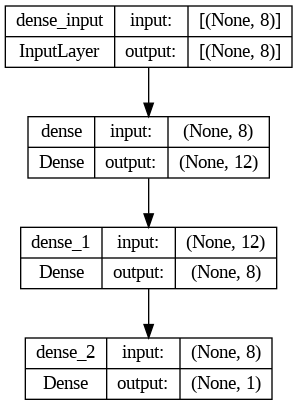

In [21]:
# Plot model
plot_model(model, show_shapes=True, show_layer_names=True)

Text(0, 0.5, 'Cross entropy loss')

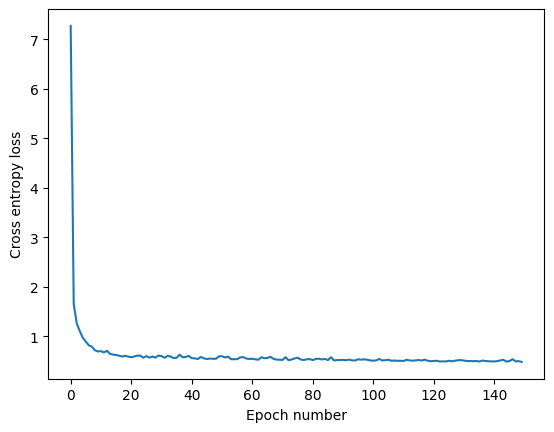

In [22]:
#Plot history
plt.plot(history.history['loss'], label='binary cross entropy loss')
plt.xlabel('Epoch number')
plt.ylabel('Cross entropy loss')

## Predictions

In [23]:
# make probability predictions with the model
predictions = model.predict(X)
# round predictions
rounded = [round(x[0]) for x in predictions]

24/24 [==============================] - 0s 2ms/step


# Task 1
Create another model (give it a different name) with a slightly different architecture, e.g. with a different number of neurons in the two hidden layers. Specify how many neurons in each layer. Add an extra hidden layer.

In [24]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
model_2 = Sequential()
model_2.add(Dense(16, input_dim=8, activation='relu'))  # Change the number of neurons in the first hidden layer
model_2.add(Dense(10, activation='relu'))  # Add an extra hidden layer with 10 neurons
model_2.add(Dense(8, activation='relu'))   # Change the number of neurons in the second hidden layer
model_2.add(Dense(1, activation='sigmoid'))

# Task 2

Split the data into a training set (80%) and a validation set (20%), by setting the *validation_split* parameter appropriately in the Keras model.


In [32]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

new_model = Sequential()
new_model.add(Dense(12, input_dim=8, activation='relu'))
new_model.add(Dense(8, activation='relu'))
new_model.add(Dense(1, activation='sigmoid'))

new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
new_model.summary()

new_model.fit(X_train, Y_train, epochs=32, batch_size=10, validation_split=0.2)
evaluation_result = new_model.evaluate(X_val, Y_val)
print(f"Validation Loss: {evaluation_result[0]}, Validation Accuracy: {evaluation_result[1]}")


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 12)                108       
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221 (884.00 Byte)
Trainable params: 221 (884.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/32
50/50 [==============================] - 1s 8ms/step - loss: 3.4923 - accuracy: 0.5967 - val_loss: 2.2552 - val_accuracy: 0.4553
Epoch 2/32
50/50 [==============================] - 0s 5ms/step - loss: 1.9843 - accuracy: 0.5031 - val_loss: 1.5678 - val_accuracy: 0.5285


# Task 3

Visualize the performance of your model during training by using the history dictionary object (part of model.fit()). Plot training loss and validation loss against Epoch.

Epoch 1/32
50/50 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.6904 - val_loss: 0.6168 - val_accuracy: 0.7236
Epoch 2/32
50/50 [==============================] - 0s 3ms/step - loss: 0.5764 - accuracy: 0.7006 - val_loss: 0.6240 - val_accuracy: 0.6748
Epoch 3/32
50/50 [==============================] - 0s 3ms/step - loss: 0.5835 - accuracy: 0.7128 - val_loss: 0.5776 - val_accuracy: 0.7073
Epoch 4/32
50/50 [==============================] - 0s 3ms/step - loss: 0.6097 - accuracy: 0.6904 - val_loss: 0.6194 - val_accuracy: 0.7073
Epoch 5/32
50/50 [==============================] - 0s 4ms/step - loss: 0.5986 - accuracy: 0.7006 - val_loss: 0.5906 - val_accuracy: 0.6585
Epoch 6/32
50/50 [==============================] - 0s 3ms/step - loss: 0.5744 - accuracy: 0.7067 - val_loss: 0.6023 - val_accuracy: 0.7154
Epoch 7/32
50/50 [==============================] - 0s 3ms/step - loss: 0.5795 - accuracy: 0.7006 - val_loss: 0.5716 - val_accuracy: 0.6992
Epoch 8/32
50/50 [==

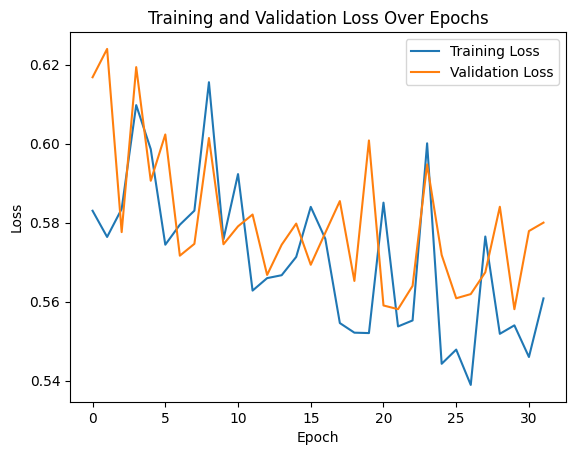

In [34]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
import matplotlib.pyplot as plt

# Train the model and store the history
history = new_model.fit(X_train, Y_train, epochs=32, batch_size=10, validation_split=0.2)

# Plot training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Task 4

Using your model from *Task 1* change the activation functions and see how this affects training.

In [35]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
new_model = Sequential()
new_model.add(Dense(16, input_dim=8, activation='tanh'))  # Change the activation function in the first hidden layer
new_model.add(Dense(10, activation='sigmoid'))  # Change the activation function in the extra hidden layer
new_model.add(Dense(8, activation='elu'))   # Change the activation function in the second hidden layer
new_model.add(Dense(1, activation='softmax'))

# Task 5

Increase the number of epochs. See what happens.

In [37]:
#Please post your solution here.
#Feel free to add markdown and code cells as you need
new_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Now you can train your model
new_model.fit(X_train, Y_train, epochs=60, batch_size=52, validation_split=0.2)



Epoch 1/60
10/10 [==============================] - 1s 24ms/step - loss: 0.6600 - accuracy: 0.3360 - val_loss: 0.6775 - val_accuracy: 0.3902
Epoch 2/60
10/10 [==============================] - 0s 7ms/step - loss: 0.6429 - accuracy: 0.3360 - val_loss: 0.6775 - val_accuracy: 0.3902
Epoch 3/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6378 - accuracy: 0.3360 - val_loss: 0.6813 - val_accuracy: 0.3902
Epoch 4/60
10/10 [==============================] - 0s 8ms/step - loss: 0.6381 - accuracy: 0.3360 - val_loss: 0.6832 - val_accuracy: 0.3902
Epoch 5/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6369 - accuracy: 0.3360 - val_loss: 0.6782 - val_accuracy: 0.3902
Epoch 6/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6354 - accuracy: 0.3360 - val_loss: 0.6763 - val_accuracy: 0.3902
Epoch 7/60
10/10 [==============================] - 0s 6ms/step - loss: 0.6342 - accuracy: 0.3360 - val_loss: 0.6757 - val_accuracy: 0.3902
Epoch 8/60
10/10 [=

# Task 6 (optional)

Try similar steps for the multiclass tutorial:

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/